# 1. Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid") # Set style for all plots

print("\n" + "="*40)
print("STEP 1: IMPORTING LIBRARIES")
print("="*40 + "\n")


STEP 1: IMPORTING LIBRARIES



# 2. Load and Inspect Data

In [13]:
print("\n" + "="*40)
print("📂 STEP 2: LOADING AND INSPECTING DATA")
print("="*40 + "\n")

df = pd.read_csv("cardekho.csv")
print("✅ Data loaded successfully")
print("\nInitial dataset shape:", df.shape)
print("\n📝 First 5 rows:")
print(df.head())
print("\n🔍 Column dtypes:")
print(df.dtypes)
print("\n📊 Basic statistics:")
print(df.describe())


📂 STEP 2: LOADING AND INSPECTING DATA

✅ Data loaded successfully

Initial dataset shape: (8128, 12)

📝 First 5 rows:
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage(km/ltr/kg)  engine  \
0  Individual       Manual   First Owner               23.40  1248.0   
1  Individual       Manual  Second Owner               21.14  1498.0   
2  Individual       Manual   Third Owner               17.70  1497.0   
3  Individual       Manual   First Owner               23.00  1396.0   
4  Individual       Manual   First Owner               16.10  1298.0  

# 3. Clean and Prepare Data


🧼 STEP 3: DATA CLEANING

🔍 Missing values BEFORE cleaning:
name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

✅ Cleaning completed

🔍 Missing values AFTER cleaning:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

📐 New dataset shape: (7906, 12)


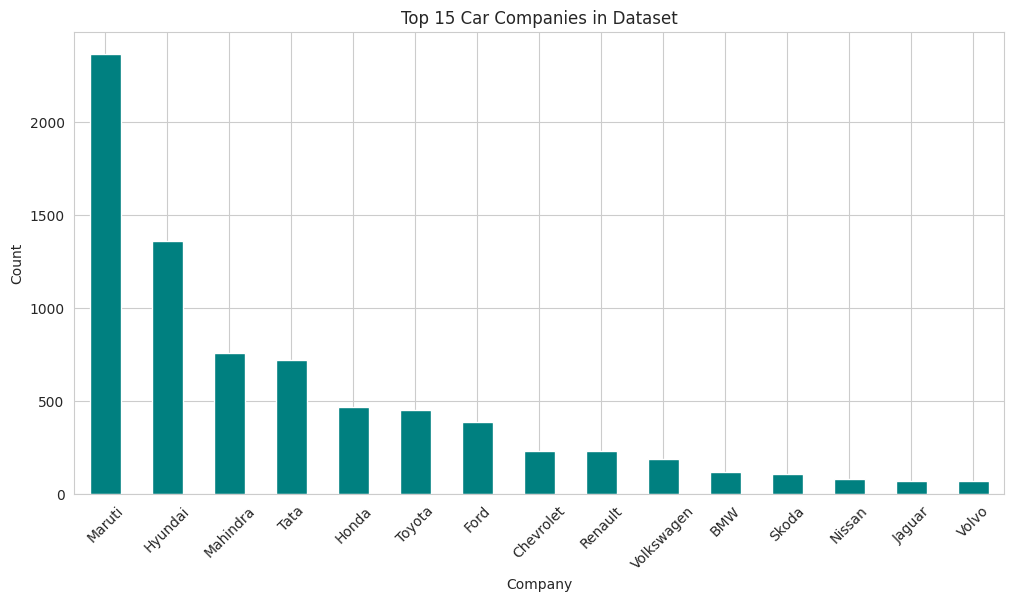

In [14]:
print("\n" + "="*40)
print("🧼 STEP 3: DATA CLEANING")
print("="*40 + "\n")

# Initial missing values
print("🔍 Missing values BEFORE cleaning:")
print(df.isna().sum())

# Cleaning process
df.rename(columns={"mileage(km/ltr/kg)": "mileage"}, inplace=True)
df.replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert numerical columns
numeric_cols = ['selling_price', 'mileage', 'engine', 'year', 'km_driven']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=numeric_cols, inplace=True)

print("\n✅ Cleaning completed")
print("\n🔍 Missing values AFTER cleaning:")
print(df.isna().sum())
print("\n📐 New dataset shape:", df.shape)

# Extract car brand
df['company'] = df['name'].str.split(' ').str[0]
df.drop('name', axis=1, inplace=True)


# 🖼️ New Visualization: Company Distribution
plt.figure(figsize=(12,6))
df['company'].value_counts().head(15).plot(kind='bar', color='teal')
plt.title("Top 15 Car Companies in Dataset")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 4. Exploratory Data Analysis


🔎 STEP 4: EXPLORATORY DATA ANALYSIS

💵 Price Statistics:
count    7.906000e+03
mean     6.498137e+05
std      8.135827e+05
min      2.999900e+04
25%      2.700000e+05
50%      4.500000e+05
75%      6.900000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


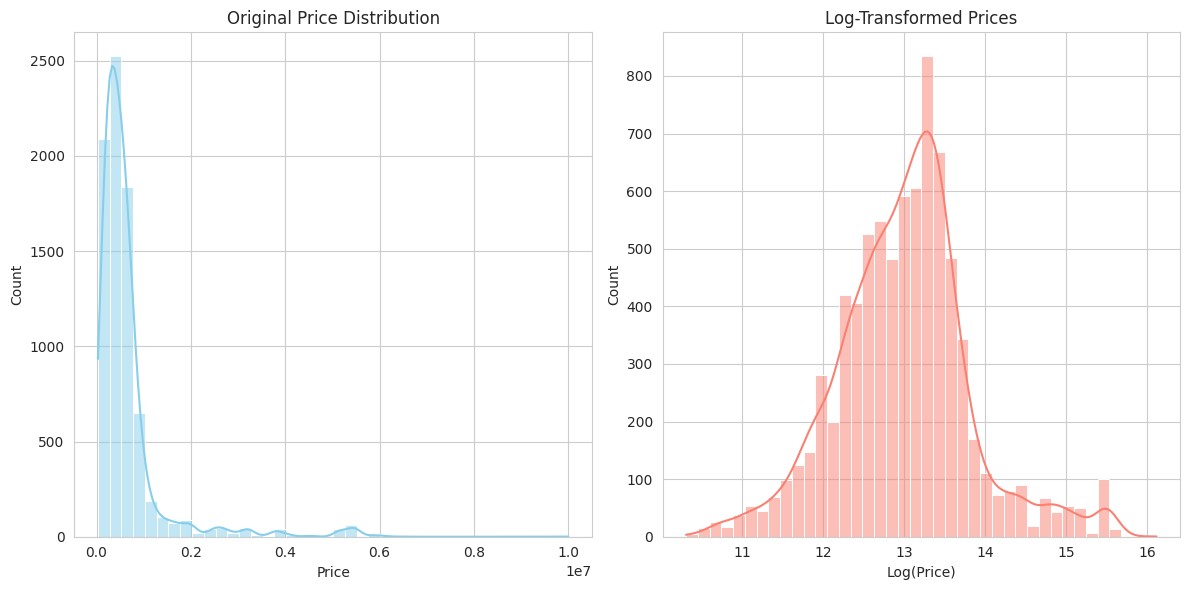

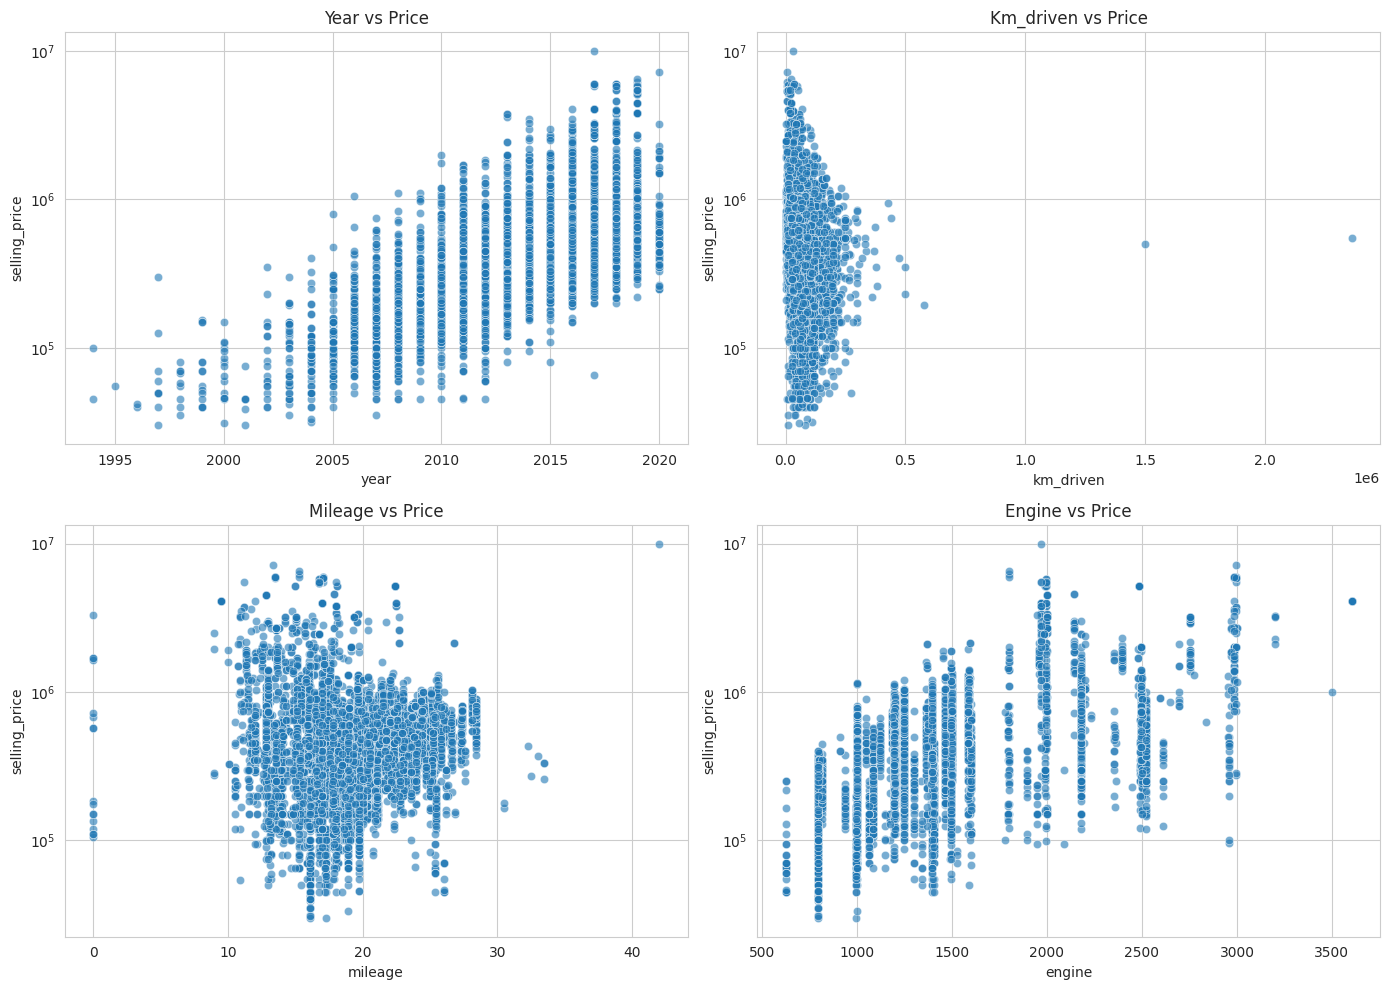

In [15]:
print("\n" + "="*40)
print("🔎 STEP 4: EXPLORATORY DATA ANALYSIS")
print("="*40 + "\n")

# Price analysis
print("💵 Price Statistics:")
print(df['selling_price'].describe())

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df['selling_price'], bins=40, kde=True, color='skyblue')
plt.title("Original Price Distribution")
plt.xlabel("Price")

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['selling_price']), bins=40, kde=True, color='salmon')
plt.title("Log-Transformed Prices")
plt.xlabel("Log(Price)")
plt.tight_layout()
plt.show()

# 🖼️ New Visualization: Numerical Features vs Price
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features_to_plot = ['year', 'km_driven', 'mileage', 'engine']

for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.scatterplot(data=df, x=feature, y='selling_price', ax=ax, alpha=0.6)
    ax.set_title(f"{feature.capitalize()} vs Price")
    ax.set_yscale('log')
plt.tight_layout()
plt.show()

#5. Prepare Modeling Data


🎯 STEP 5: PREPARING MODELING DATA

📐 Features shape: (7906, 11)
📐 Target shape: (7906,)

🔍 Sample features:
   year  km_driven    fuel seller_type transmission         owner  mileage  \
0  2014     145500  Diesel  Individual       Manual   First Owner    23.40   
1  2014     120000  Diesel  Individual       Manual  Second Owner    21.14   
2  2006     140000  Petrol  Individual       Manual   Third Owner    17.70   
3  2010     127000  Diesel  Individual       Manual   First Owner    23.00   
4  2007     120000  Petrol  Individual       Manual   First Owner    16.10   

   engine max_power  seats  company  
0  1248.0        74    5.0   Maruti  
1  1498.0    103.52    5.0    Skoda  
2  1497.0        78    5.0    Honda  
3  1396.0        90    5.0  Hyundai  
4  1298.0      88.2    5.0   Maruti  


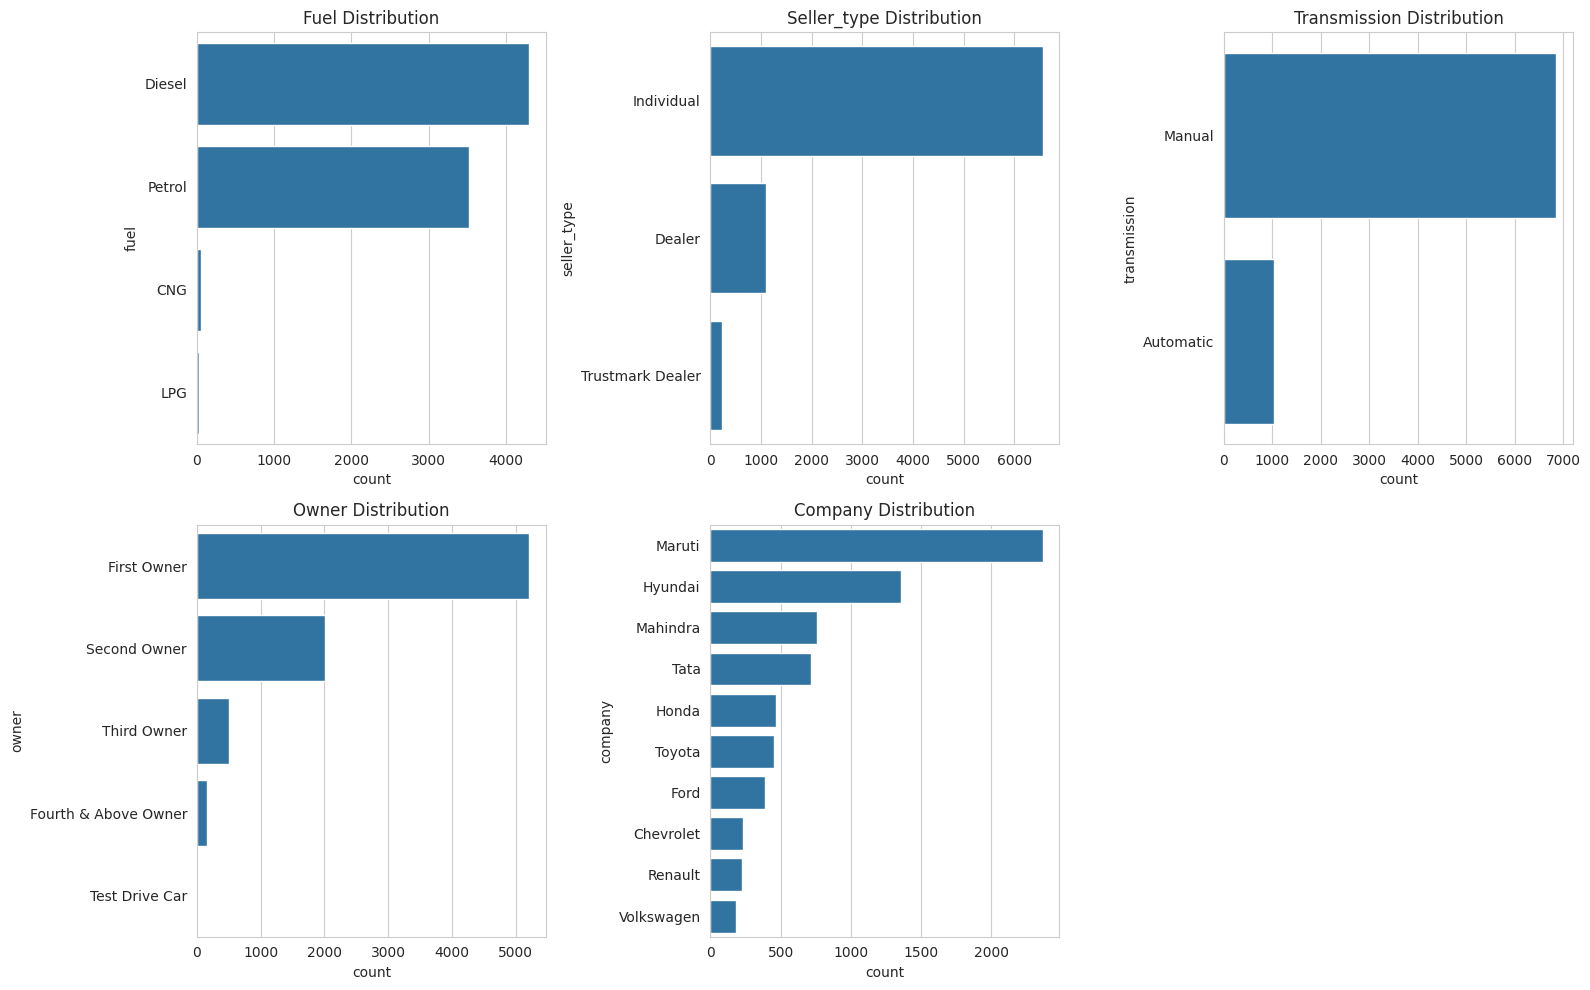


✅ Data split completed
📐 Training data shape: (6324, 11)
📐 Test data shape: (1582, 11)


In [16]:
print("\n" + "="*40)
print("🎯 STEP 5: PREPARING MODELING DATA")
print("="*40 + "\n")

X = df.drop('selling_price', axis=1)
y = np.log1p(df['selling_price'])  # Log transformation

print("📐 Features shape:", X.shape)
print("📐 Target shape:", y.shape)
print("\n🔍 Sample features:")
print(X.head())

# 🖼️ New Visualization: Categorical Features Distribution
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'company']
plt.figure(figsize=(16, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=X, y=feature, order=X[feature].value_counts().index[:10])
    plt.title(f"{feature.capitalize()} Distribution")
plt.tight_layout()
plt.show()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\n✅ Data split completed")
print("📐 Training data shape:", X_train.shape)
print("📐 Test data shape:", X_test.shape)

#6. Create Preprocessing Pipeline

In [17]:
print("\n" + "="*40)
print("⚙️ STEP 6: PREPROCESSING PIPELINE")
print("="*40 + "\n")

numerical_features = ['year', 'km_driven', 'mileage', 'engine']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'company']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ])

print("🔧 Preprocessor configuration:")
print(preprocessor)


⚙️ STEP 6: PREPROCESSING PIPELINE

🔧 Preprocessor configuration:
ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['year', 'km_driven', 'mileage', 'engine']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['fuel', 'seller_type', 'transmission',
                                  'owner', 'company'])])


#7. Model Training

In [18]:
print("\n" + "="*40)
print("🤖 STEP 7: MODEL TRAINING")
print("="*40 + "\n")

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🔨 Training {name}...")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Cross-validation
    cv_scores = cross_val_score(
        pipeline, X_train, y_train,
        cv=5, scoring='r2'
    )

    print(f"🔍 {name} Cross-Validation R² Scores:")
    print([f"{score:.3f}" for score in cv_scores])
    print(f"📊 Average CV R²: {np.mean(cv_scores):.3f}")

    # Full training
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = np.expm1(pipeline.predict(X_test))
    y_test_exp = np.expm1(y_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred))
    r2 = r2_score(y_test_exp, y_pred)

    results[name] = {
        'Avg CV R2': round(np.mean(cv_scores), 3),
        'Test R2': round(r2, 3),
        'Test RMSE': round(rmse, 2)
    }

    print(f"✅ {name} training completed")
    print(f"📈 Test R²: {r2:.3f}")
    print(f"📉 Test RMSE: {rmse:,.2f}\n")



🤖 STEP 7: MODEL TRAINING


🔨 Training Linear Regression...
🔍 Linear Regression Cross-Validation R² Scores:
['0.882', '0.879', '0.889', '0.888', '0.883']
📊 Average CV R²: 0.884
✅ Linear Regression training completed
📈 Test R²: 0.933
📉 Test RMSE: 215,166.70


🔨 Training Random Forest...
🔍 Random Forest Cross-Validation R² Scores:
['0.923', '0.931', '0.938', '0.926', '0.936']
📊 Average CV R²: 0.931
✅ Random Forest training completed
📈 Test R²: 0.977
📉 Test RMSE: 125,141.01



#8. Results Comparison


📊 STEP 8: RESULTS COMPARISON

🏆 Final Model Performance:
                   Avg CV R2  Test R2  Test RMSE
Random Forest          0.931    0.977  125141.01
Linear Regression      0.884    0.933  215166.70


<Figure size 1000x600 with 0 Axes>

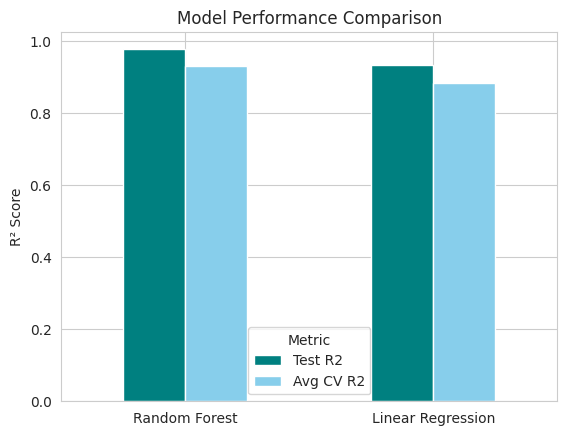

In [19]:

print("\n" + "="*40)
print("📊 STEP 8: RESULTS COMPARISON")
print("="*40 + "\n")

results_df = pd.DataFrame(results).T.sort_values(by="Test R2", ascending=False)
print("🏆 Final Model Performance:")
print(results_df)

# 🖼️ New Visualization: Model Comparison
plt.figure(figsize=(10,6))
results_df[['Test R2', 'Avg CV R2']].plot(kind='bar', color=['teal', 'skyblue'])
plt.title("Model Performance Comparison")
plt.ylabel("R² Score")
plt.xticks(rotation=0)
plt.legend(title='Metric')
plt.show()


#9. Best Model Analysis


🔍 STEP 9: BEST MODEL ANALYSIS

🏆 Best Model: Random Forest

📊 Feature Importances:

Top 10 Features:
                   Feature  Importance
0                     year    0.454735
3                   engine    0.348774
11  transmission_Automatic    0.049243
12     transmission_Manual    0.033474
1                km_driven    0.027979
2                  mileage    0.027449
44            company_Tata    0.017602
45          company_Toyota    0.009350
21       company_Chevrolet    0.004274
13       owner_First Owner    0.003383


<ipython-input-20-518561f93376>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')


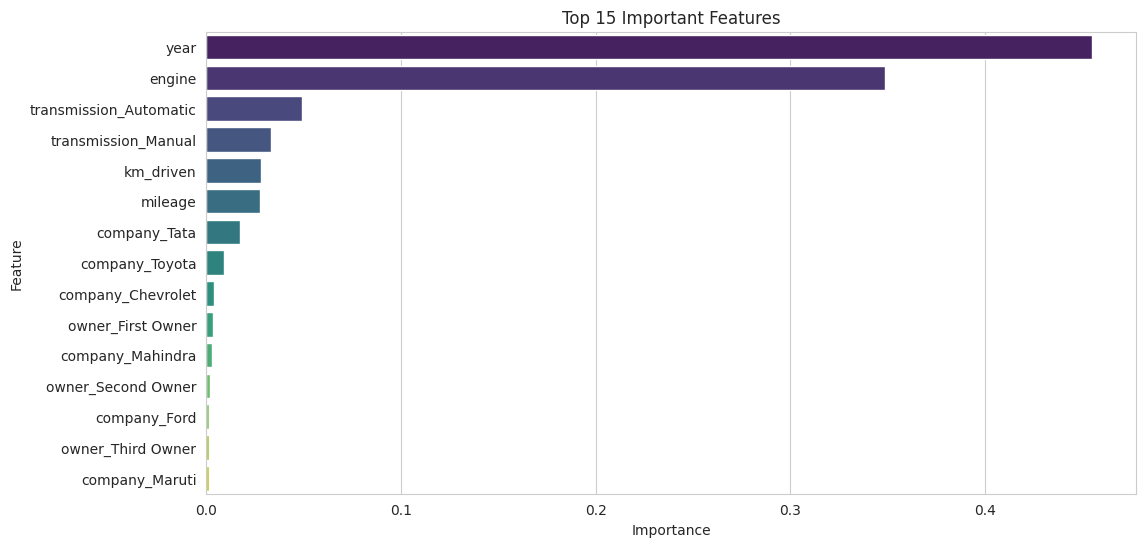

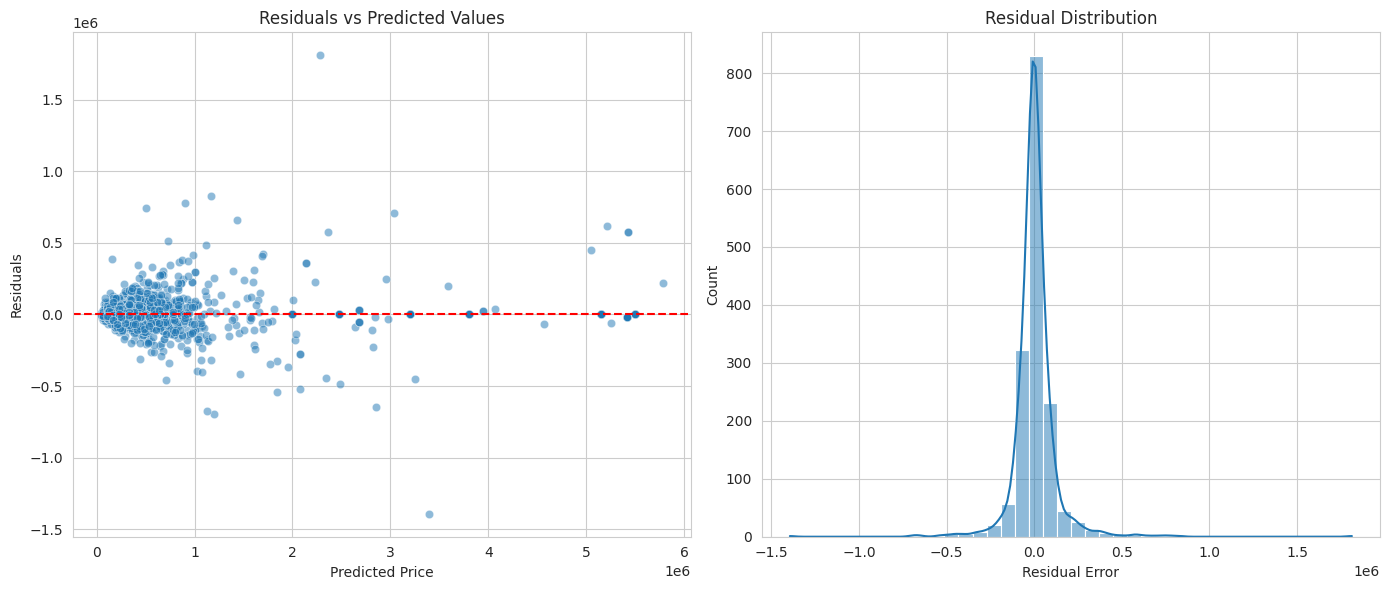

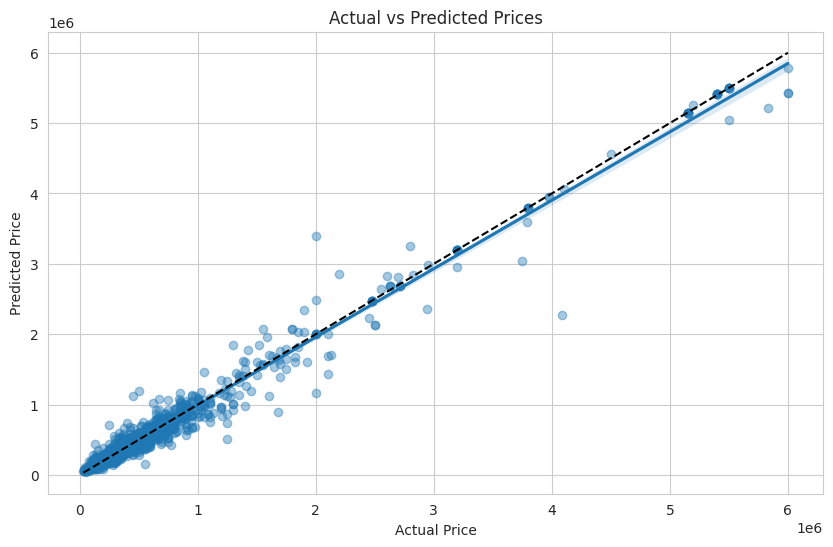


🎉 ANALYSIS COMPLETE!


In [20]:
print("\n" + "="*40)
print("🔍 STEP 9: BEST MODEL ANALYSIS")
print("="*40 + "\n")

best_model_name = results_df.index[0]
best_model = models[best_model_name]
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', best_model)
]).fit(X_train, y_train)

print(f"🏆 Best Model: {best_model_name}")

# Feature Importance
if hasattr(best_model, 'feature_importances_'):
    print("\n📊 Feature Importances:")

    # Get feature names
    cat_features = best_pipeline.named_steps['preprocessor']\
                         .named_transformers_['cat']\
                         .get_feature_names_out(categorical_features)
    all_features = numerical_features + list(cat_features)

    # Create importance dataframe
    importance_df = pd.DataFrame({
        'Feature': all_features,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nTop 10 Features:")
    print(importance_df.head(10))

    # Visualization
    plt.figure(figsize=(12,6))
    sns.barplot(data=importance_df.head(15), x='Importance', y='Feature', palette='viridis')
    plt.title("Top 15 Important Features")
    plt.show()

# 🖼️ New Visualization: Residual Analysis
y_final_pred = np.expm1(best_pipeline.predict(X_test))
residuals = y_test_exp - y_final_pred

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x=y_final_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual Error")
plt.tight_layout()
plt.show()

# 🖼️ New Visualization: Prediction Error Plot
plt.figure(figsize=(10,6))
sns.regplot(x=y_test_exp, y=y_final_pred, scatter_kws={'alpha':0.4})
plt.plot([y_test_exp.min(), y_test_exp.max()],
         [y_test_exp.min(), y_test_exp.max()], 'k--')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

print("\n" + "="*40)
print("🎉 ANALYSIS COMPLETE!")
print("="*40)